In [1]:
# 生成聚类数据集
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)


In [2]:
# 导入包
import math
import random
import numpy as np

import matplotlib.pyplot as plt

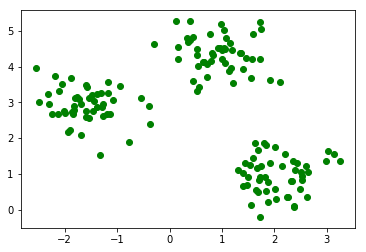

In [3]:
# 可视化聚类数据集
plt.scatter(X[:,0], X[:,1], color='green')
plt.show()

In [4]:
# kmeans聚类
class EasyKmeans:
    def __init__(self, k, n=20):
        self.k = k # k个中心点
        self.n = n # 目标迭代次数
        
    def fit(self, x, centers=None):
        # 第一步，随机选择 K 个点, 或者指定
        if centers is None:
            idx = np.random.randint(low=0, high=len(x), size=self.k) # 随机选择k个中心点的序号idx
            centers = x[idx] # 给中心点centers赋值
        
        inters = 0 # 当前迭代次数
        while inters < self.n: # 当前迭代次数小于目标迭代次数
            points_set = {key: [] for key in range(self.k)} # 这个字典的键是中心点序号，值是空列表，用来放被该中心点聚类的实例点集合

            # 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
            for p in x:
                nearest_index = np.argmin(np.sum((centers - p) ** 2, axis=1) ** 0.5) # 计算最近的中心点
                points_set[nearest_index].append(p) # 把当前实例点放入对应聚类中心的组（被该聚类中心聚类的实例点的集合）里

            # 第三步，遍历每一个点集，计算新的聚类中心
            for i_k in range(self.k):
                centers[i_k] = sum(points_set[i_k])/len(points_set[i_k]) # 计算各聚类中心的组（被该聚类中心聚类的实例点的集合）的平均值，更新聚类中心
                
            inters += 1

        
            
        return points_set, centers # 返回聚类中心和聚类中心的组（被该聚类中心聚类的实例点的集合）

In [5]:
cls = EasyKmeans(3)
points_set, centers = cls.fit(X)

In [6]:
centers

array([[-1.5947298 ,  2.92236966],
       [ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712]])

In [7]:
points_set

{0: [array([-2.12133364,  2.66447408]),
  array([-0.37494566,  2.38787435]),
  array([-1.84562253,  2.71924635]),
  array([-1.99912714,  2.71285741]),
  array([-1.47804153,  3.2093591 ]),
  array([-1.5933443 ,  2.76898682]),
  array([-1.26637157,  2.62998828]),
  array([-2.54224625,  3.95012869]),
  array([-1.59487886,  3.48632794]),
  array([-1.82556205,  2.7989214 ]),
  array([-1.13374003,  2.68467271]),
  array([-1.758702,  3.158623]),
  array([-1.32738084,  1.53158588]),
  array([-1.6814105 ,  2.07988036]),
  array([-1.18113464,  3.26525683]),
  array([-1.19371247,  2.68752237]),
  array([-1.44865074,  3.03397278]),
  array([-1.18199493,  3.56880538]),
  array([-2.31837321,  3.22307195]),
  array([-0.54894786,  3.11292892]),
  array([-1.6823471 ,  2.96658234]),
  array([-1.53541422,  3.10745813]),
  array([-0.39724954,  2.89675369]),
  array([-1.93358614,  2.1846701 ]),
  array([-1.38373217,  3.22230418]),
  array([-1.79833475,  3.12590728]),
  array([-2.0495307 ,  3.52345491]),
  

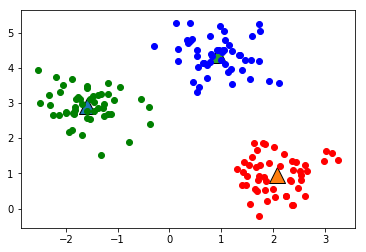

In [8]:
# 可视化聚类结果
cat1 = np.asarray(points_set[0])
cat2 = np.asarray(points_set[1])
cat3 = np.asarray(points_set[2])

for ix, p in enumerate(centers): # 画出3个聚类中心
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1[:,0], cat1[:,1], color='green')
plt.scatter(cat2[:,0], cat2[:,1], color='red')
plt.scatter(cat3[:,0], cat3[:,1], color='blue')

plt.show()